# Aula 14 - Testes de hipóteses para a média - Exemplo

Curiosidade: Este é o mesmo procedimento usado por Simon Newcomb para provar que a velocidade da luz tinha um valor diferente daquele assiumido  pelo consenso científico até 1882. Veja mais [neste link](http://www.stat.ucla.edu/~rgould/110as02/bshypothesis.pdf).



## Exemplo do termopar - teste de hipóteses para média


Vamos refazer o exercício-exemplo da Aula 13 utilizando testes de hipóteses

reamostragem para definir o intervalo de confiança


O tempo de vida, em horas, de um termopar* usado em fornalhas é suposto ser aproximadamente normal. Uma amostra aleatória de 15 termopares resultarou nos seguintes tempos:

`553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529`

A empresa diz que um termopar deve durar, em média, 560 horas. Há evidências de que essa afirmação seja verdadeira? 

Considere um coeficiente nível de confiança \alpha de 0.05.



In [75]:
import numpy as np
import matplotlib as plt
import pandas as pd
from scipy import stats

%matplotlib inline

dados = [553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529]
dados = np.array(dados)
n = len(dados)
media_H0 = 560

## Formulação das hipóteses

Lembrando a estrutura de testes de hipóteses:

A hipótese que queremos provar é que existe um efeito - neste caso que a empresa mente e os termopares não duram 560 horas.  Ou seja:
    
$$H_a: \mu \neq 560$$
        
A hipótese nula é que **não existe efeito**, ou seja, os termopares seguem a média da distribuição prometida pela empresa e a média baixa que obtivemos na amostra é fruto do acaso.

$$H_0: \mu = 560$$

O nosso limiar para aceitar que um efeito é causado pelo acaso ou não é o $\alpha$. Se a probabilidade do efeito observado (ou de um valor mais extremo) é menor que $\alpha$ não acreditamos que é obra do acaso e rejeitamos a hipótese nula. 


Portanto temos: $$H_0: \mu = 560$$ e $$H_a: \mu \neq 560$$

Note que como a hipótese alternativa envolve um sinal de $\neq$ precisaremos trabalhar com um teste bicaudal.
    


In [76]:
x_barra = np.mean(dados)
print("Média da amostra", x_barra)

Média da amostra 551.333333333


## Correção da média bootstrap

Vamos gerar a distribuição *bootstrap* para a amostra observada. Note que a distribuição tende a ser centrada no valor da média da única amostra que obtivemos


Média da distribuição simulada 551.34516


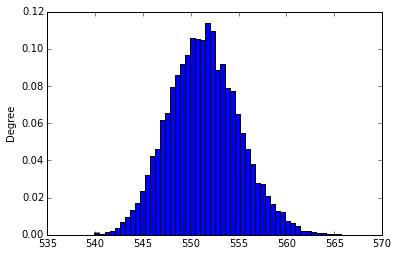

In [77]:
# Este código é idêntico ao da aula 13

num_vezes = 10000


medias_amostrais = np.zeros(num_vezes)


for i in range(num_vezes):
    # Gera uma reamostra dos dados _com_ reposição
    amostra = np.random.choice(dados, size=n, replace=True)
    media = np.mean(amostra)
    medias_amostrais[i] = media


bins = np.linspace(min(medias_amostrais), max(medias_amostrais), 50)
pd.DataFrame.plot(kind='hist', data=pd.Series(medias_amostrais), bins=bins, normed=True, legend=False)

media_geral = np.mean(medias_amostrais)

print("Média da distribuição simulada", media_geral)

Este é um ponto delicado e **requer muita atenção**. 

Para rejeitarmos a hipótese nula, precisamos mostrar que o valor da média amostral $\bar{x}$ que obtivemos é extremo <font color=red>mesmo que a população tivesse a média $\mu = \mu_0 = 560$</font>.

Nós não conhecemos como a distribuição amostral seria se a população tivesse média 560.

Para simular esta distribuição amostral que concordaria com $H_0$, vamos deslocar a distribuição amostral obtida para centrá-la em 560. 

Para isso somaremos em cada média amostral obtida o valor `560 - media_geral`

In [78]:
medias_amostrais = medias_amostrais + (media_geral - media_H0)

Agora plotamos o novo histograma corrigido

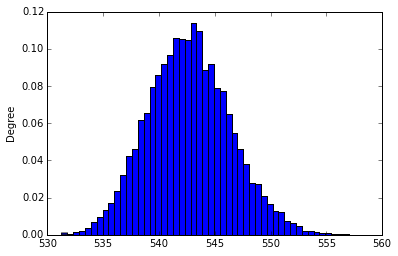

In [79]:
bins = np.linspace(min(medias_amostrais), max(medias_amostrais), 50)
pd.DataFrame.plot(kind='hist', data=pd.Series(medias_amostrais), bins=bins, normed=True, legend=False)

Agora que temos um histograma que **simula a distribuição hipotetisada por $H_0$**, podemos calcular a região crítica.

Como temos um teste bicaudal com $\alpha=0.05$, precisamos calcular os valores que correspondem aos percentis de $\frac{\alpha}{2}$ e $1 - \frac{\alpha}{2}$.

Lembre-se de que temos duas regiões críticas porque temos um teste bicaudal, e vamos rejeitar valores improváveis tanto à esquerda da distribuição quanto à direita.

## Argumentação por região crítica

In [80]:
rc1 = np.percentile(medias_amostrais, 2.5)

print("Região crítica 1: valores menores que", rc1, "permitem rejeitar a hipótese nula H0")

Região crítica 1: valores menores que 535.811826667 permitem rejeitar a hipótese nula H0


In [81]:
rc2 = np.percentile(medias_amostrais, 2.5)

print("Região crítica 2: valores maiores que", rc2, "permitem rejeitar a hipótese nula H0")
np.percentile(medias_amostrais, 97.5)

Região crítica 2: valores maiores que 535.811826667 permitem rejeitar a hipótese nula H0


550.34516000000008

In [82]:
if x_barra < rc1:
    print("Hipótese nula rejeitada porque x_barra é menor que rc1")
elif x_barra > rc2:
    print("Hipótese nula rejeitada porque x_barra é menor que rc2")


Hipótese nula rejeitada porque x_barra é menor que rc2


Portanto, rejeitamos a hipótese $H_0$ e concluímos que os termospares estão fora de especificação

## Argumentação por p-value

Dada a distribuição deslocada, vamos calcular qual a probabilidade de termos um valor igual ao $\bar{x}$ ou `x_barra` ou ainda mais extremo.

Quando temos dados, a função capaz de fazer isso é a `stats.percentileofscore()`.

In [83]:
score = stats.percentileofscore(medias_amostrais, x_barra)/100

O valor de `score`nos diz que este é um extremo à direita. Portanto:

In [84]:
pvalue = 1 - score
pvalue

0.013700000000000045

Como faço para comparar `pvalue` e $\alpha/2$  para aceitar ou rejeitar $H_0$?